In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = pd.read_csv('weatherstats_fortmcmurray_hourly.csv')
df.head()


,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,...,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation,max_air_temp_pst1hr,min_air_temp_pst1hr
0,2024-09-26 18:00:00 HAR,1727395200,95.85,100.26,W,26.0,13,NaN,54,5.6,...,NaN,NaN,16100.0,NaN,4.0,NaN,NaN,NaN,15.1,14.6
1,2024-09-26 17:00:00 HAR,1727391600,95.86,100.27,W,26.0,11,NaN,62,7.4,...,NaN,NaN,16100.0,2.0,3.0,NaN,NaN,NaN,14.8,12.3
2,2024-09-26 16:00:00 HAR,1727388000,95.84,100.26,WNW,30.0,13,NaN,76,8.6,...,NaN,NaN,16100.0,1.8,4.0,NaN,NaN,NaN,14.1,12.7
3,2024-09-26 15:00:00 HAR,1727384400,95.82,100.23,WNW,30.0,17,28.0,67,7.0,...,NaN,NaN,16100.0,1.7,3.0,NaN,NaN,NaN,13.5,11.9
4,2024-09-26 14:00:00 HAR,1727380800,95.78,100.19,W,28.0,22,31.0,74,8.1,...,NaN,NaN,16100.0,1.6,4.0,NaN,NaN,NaN,12.7,11.1


In [51]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time_local      20000 non-null  object 
 1   unixtime             20000 non-null  int64  
 2   pressure_station     20000 non-null  float64
 3   pressure_sea         20000 non-null  float64
 4   wind_dir             19996 non-null  object 
 5   wind_dir_10s         19999 non-null  float64
 6   wind_speed           20000 non-null  int64  
 7   wind_gust            2974 non-null   float64
 8   relative_humidity    20000 non-null  int64  
 9   dew_point            20000 non-null  float64
 10  temperature          20000 non-null  float64
 11  windchill            6872 non-null   float64
 12  humidex              1341 non-null   float64
 13  visibility           19966 non-null  float64
 14  health_index         19609 non-null  float64
 15  cloud_cover_4        19820 non-null 

Index(['date_time_local', 'unixtime', 'pressure_station', 'pressure_sea',
       'wind_dir', 'wind_dir_10s', 'wind_speed', 'wind_gust',
       'relative_humidity', 'dew_point', 'temperature', 'windchill', 'humidex',
       'visibility', 'health_index', 'cloud_cover_4', 'cloud_cover_8',
       'cloud_cover_10', 'solar_radiation', 'max_air_temp_pst1hr',
       'min_air_temp_pst1hr'],
      dtype='object')

In [52]:
wind_dir_map = {
    'N': 0.0, 'NNE': 22.5, 'NE': 45.0, 'ENE': 67.5,
    'E': 90.0, 'ESE': 112.5, 'SE': 135.0, 'SSE': 157.5,
    'S': 180.0, 'SSW': 202.5, 'SW': 225.0, 'WSW': 247.5,
    'W': 270.0, 'WNW': 292.5, 'NW': 315.0, 'NNW': 337.5
}
# Áp dụng ánh xạ vào cột wind_dir
df['wind_direction'] = df['wind_dir'].map(wind_dir_map)


In [53]:
df.drop(['wind_dir', 'wind_gust', 'windchill', 'humidex', 'cloud_cover_8', 'cloud_cover_10', 'solar_radiation'], axis=1, inplace=True)
df.dropna(inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 19426 entries, 1 to 19999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time_local      19426 non-null  object 
 1   unixtime             19426 non-null  int64  
 2   pressure_station     19426 non-null  float64
 3   pressure_sea         19426 non-null  float64
 4   wind_dir_10s         19426 non-null  float64
 5   wind_speed           19426 non-null  int64  
 6   relative_humidity    19426 non-null  int64  
 7   dew_point            19426 non-null  float64
 8   temperature          19426 non-null  float64
 9   visibility           19426 non-null  float64
 10  health_index         19426 non-null  float64
 11  cloud_cover_4        19426 non-null  float64
 12  max_air_temp_pst1hr  19426 non-null  float64
 13  min_air_temp_pst1hr  19426 non-null  float64
 14  wind_direction       19426 non-null  float64
dtypes: float64(11), int64(3), object(1)
memor

In [54]:


df.describe()






,unixtime,pressure_station,pressure_sea,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,visibility,health_index,cloud_cover_4,max_air_temp_pst1hr,min_air_temp_pst1hr,wind_direction
count,1.942600e+04,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000,19426.000000
mean,1.691304e+09,96.939640,101.479393,20.156903,12.357922,68.551580,-1.530773,4.609595,14704.813137,2.610769,1.958252,5.254870,3.950613,178.893879
std,2.075183e+07,0.843577,0.931976,9.710104,6.879258,19.770858,12.361268,14.173654,3559.700796,1.967287,1.841173,14.286805,14.066267,100.319313
min,1.655399e+09,93.910000,98.330000,0.000000,0.000000,10.000000,-46.500000,-42.500000,0.000000,1.000000,0.000000,-42.100000,-42.900000,0.000000
25%,1.673353e+09,96.370000,100.860000,11.000000,8.000000,54.000000,-10.000000,-6.000000,16100.000000,1.700000,0.000000,-5.500000,-6.500000,90.000000
50%,1.691221e+09,96.910000,101.410000,21.000000,11.000000,72.000000,1.000000,7.600000,16100.000000,2.100000,2.000000,8.200000,6.900000,180.000000
75%,1.709185e+09,97.440000,101.980000,29.000000,17.000000,84.000000,8.700000,15.500000,16100.000000,2.600000,4.000000,16.300000,14.800000,270.000000
max,1.727392e+09,100.520000,105.620000,36.000000,54.000000,100.000000,20.200000,35.200000,16100.000000,11.000000,4.000000,35.500000,34.100000,337.500000


In [55]:
df.columns



Index(['date_time_local', 'unixtime', 'pressure_station', 'pressure_sea',
       'wind_dir_10s', 'wind_speed', 'relative_humidity', 'dew_point',
       'temperature', 'visibility', 'health_index', 'cloud_cover_4',
       'max_air_temp_pst1hr', 'min_air_temp_pst1hr', 'wind_direction'],
      dtype='object')

In [56]:
df_nor =df.copy()
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
min_max_scaler = MinMaxScaler()
df_nor[numeric_columns] = min_max_scaler.fit_transform(df_nor[numeric_columns])
df_nor.head()













,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,visibility,health_index,cloud_cover_4,max_air_temp_pst1hr,min_air_temp_pst1hr,wind_direction
1,2024-09-26 17:00:00 HAR,1.00000,0.295008,0.266118,0.722222,0.203704,0.577778,0.808096,0.734878,1.0,0.10,0.75,0.733247,0.716883,0.800000
2,2024-09-26 16:00:00 HAR,0.99995,0.291982,0.264746,0.833333,0.240741,0.733333,0.826087,0.710425,1.0,0.08,1.00,0.724227,0.722078,0.866667
3,2024-09-26 15:00:00 HAR,0.99990,0.288956,0.260631,0.833333,0.314815,0.633333,0.802099,0.712999,1.0,0.07,0.75,0.716495,0.711688,0.866667
4,2024-09-26 14:00:00 HAR,0.99985,0.282905,0.255144,0.777778,0.407407,0.711111,0.818591,0.710425,1.0,0.06,1.00,0.706186,0.701299,0.800000
5,2024-09-26 13:00:00 HAR,0.99980,0.270802,0.244170,0.777778,0.407407,0.822222,0.824588,0.689833,1.0,0.10,0.75,0.686856,0.692208,0.800000


In [57]:
df_sta = df.copy()
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
standard_scaler = StandardScaler()
df_sta[numeric_columns] = standard_scaler.fit_transform(df_sta[numeric_columns])
df_sta.head()






,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,visibility,health_index,cloud_cover_4,max_air_temp_pst1hr,min_air_temp_pst1hr,wind_direction
1,2024-09-26 17:00:00 HAR,1.739053,-1.279868,-1.297699,0.601770,-0.197399,-0.331384,0.722499,0.704876,0.391949,-0.310471,0.565821,0.668125,0.593590,0.908185
2,2024-09-26 16:00:00 HAR,1.738880,-1.303577,-1.308430,1.013722,0.093338,0.376747,0.819579,0.570821,0.391949,-0.412136,1.108967,0.619128,0.622028,1.132474
3,2024-09-26 15:00:00 HAR,1.738707,-1.327286,-1.340620,1.013722,0.674811,-0.078480,0.690139,0.584932,0.391949,-0.462969,0.565821,0.577130,0.565153,1.132474
4,2024-09-26 14:00:00 HAR,1.738533,-1.374705,-1.383541,0.807746,1.401652,0.275585,0.779129,0.570821,0.391949,-0.513802,1.108967,0.521133,0.508278,0.908185
5,2024-09-26 13:00:00 HAR,1.738360,-1.469541,-1.469382,0.807746,1.401652,0.781393,0.811489,0.457932,0.391949,-0.310471,0.565821,0.416138,0.458512,0.908185


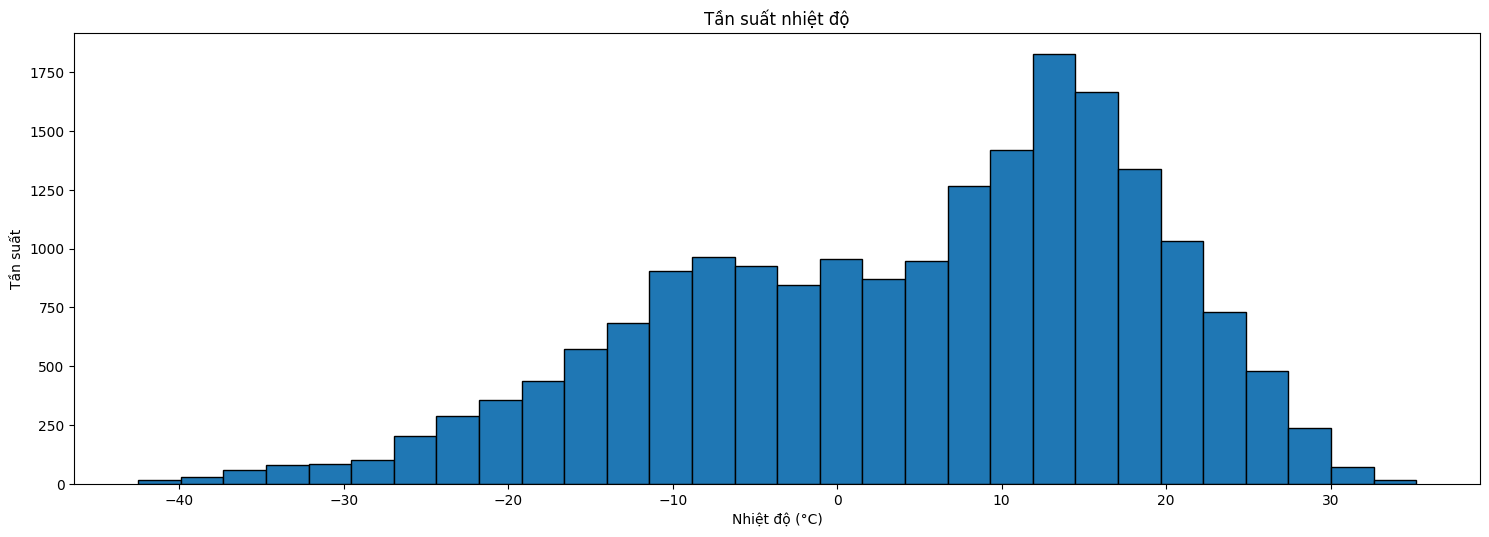

In [70]:

from datetime import datetime

def parse_datetime(datetime_str):
    return datetime.strptime(datetime_str[:-4], "%Y-%m-%d %H:%M:%S")

temperature_data = df['temperature']
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 2)
plt.hist(temperature_data, bins=30, edgecolor='black')
plt.title('Tần suất nhiệt độ')
plt.xlabel('Nhiệt độ (°C)')
plt.ylabel('Tần suất')
plt.tight_layout()
plt.show()











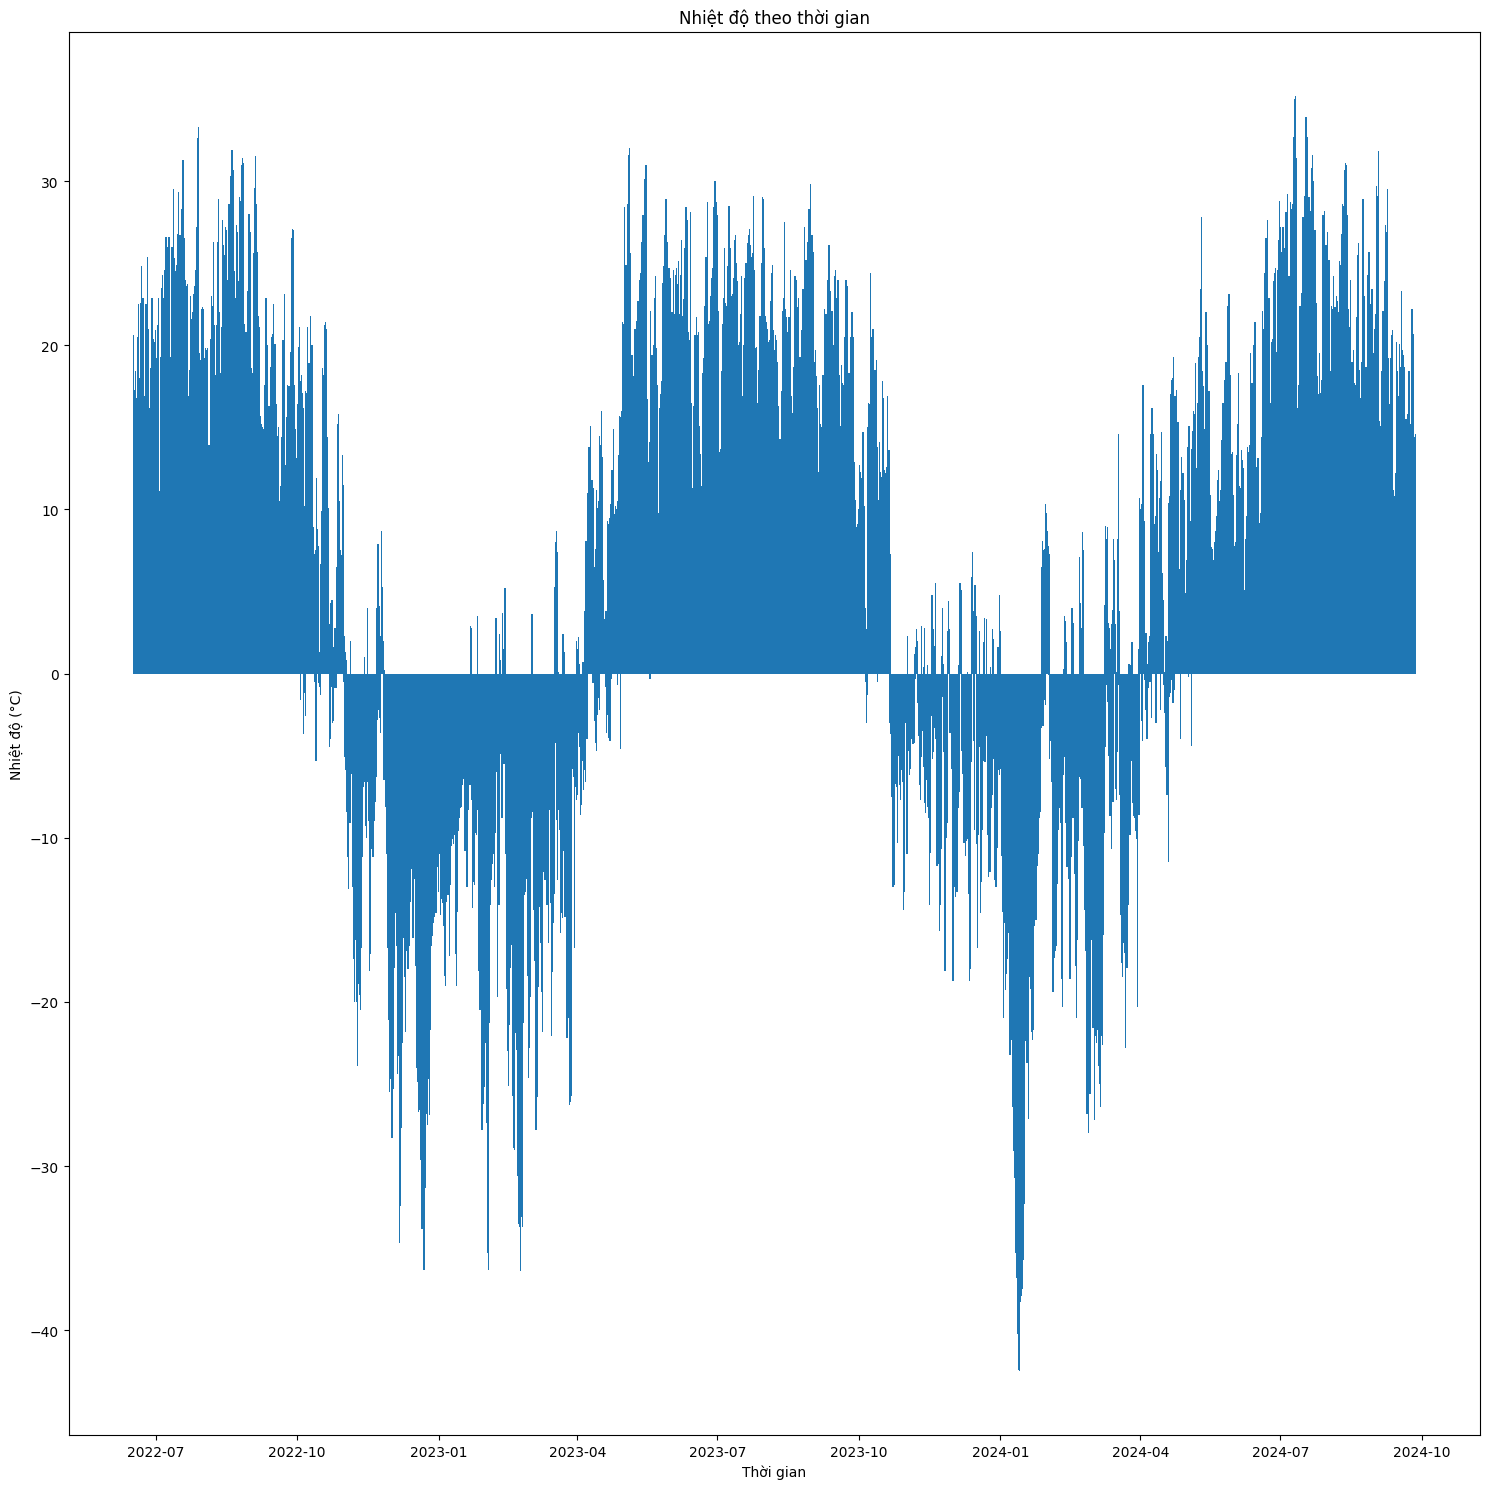

In [68]:


date_time=df['date_time_local'].apply(parse_datetime)
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(date_time, df['temperature'])
ax.set_title('Nhiệt độ theo thời gian')
ax.set_xlabel('Thời gian')
ax.set_ylabel('Nhiệt độ (°C)')
plt.tight_layout()
plt.show()



